In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,33.481329,9.495518,6.277127,8.045200,19.191048
1,47.820649,37.196856,6.706202,9.648112,23.884398
2,21.851270,15.349778,9.435272,14.703069,19.988920
3,58.808093,18.112232,12.060295,15.409802,15.846886
4,25.739674,4.171772,7.363219,-10.788134,21.777223


<AxesSubplot:ylabel='Density'>

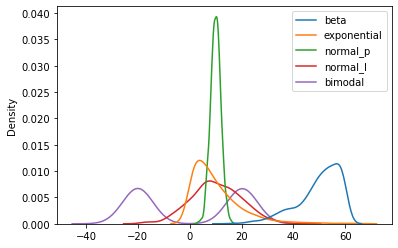

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.969543,10.206222,10.008339,10.270072,0.060140
std,8.334290,9.666499,1.967933,9.727733,20.394193
min,15.142479,0.021790,3.057949,-18.217193,-30.004432
25%,45.930629,3.283037,8.689203,3.982452,-19.986707
50%,51.962686,7.359639,10.009825,9.963093,-1.587937
75%,56.617261,14.092309,11.305971,16.916705,20.303467
max,59.986934,64.785449,16.462554,43.241679,28.334378


<AxesSubplot:ylabel='Density'>

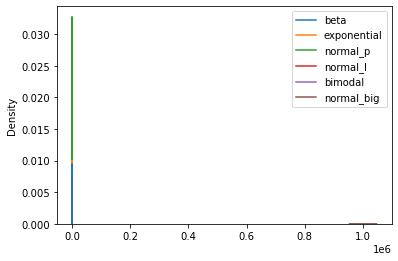

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

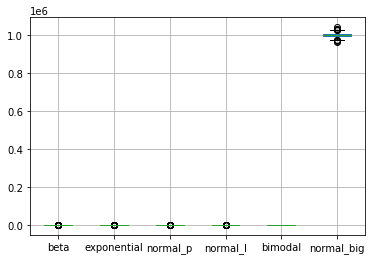

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [9]:
# Khai báo đối tượng RobustScaler
scaler = RobustScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-1.729390,0.197597,-1.426454,-0.148280,0.515733,-0.137438
1,-0.387591,2.760335,-1.262482,-0.024353,0.632222,-1.963998
2,-2.817671,0.739193,-0.219566,0.366467,0.535536,1.067302
3,0.640558,0.994756,0.783589,0.421107,0.432731,0.810099
4,-2.453814,-0.294920,-1.011403,-1.604362,0.579922,0.080247


<AxesSubplot:ylabel='Density'>

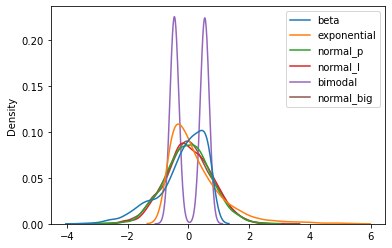

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [13]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03
mean,-0.186508,0.263346,-0.000568,2.373379e-02,0.040905,9.167322e-03
std,0.779880,0.894278,0.752047,7.520908e-01,0.506183,7.759181e-01
min,-3.445445,-0.678848,-2.656665,-2.178733e+00,-0.705296,-2.940558e+00
25%,-0.564449,-0.377139,-0.504677,-4.623879e-01,-0.456657,-4.829929e-01
50%,0.000000,0.000000,0.000000,-6.852158e-17,0.000000,4.492175e-15
75%,0.435551,0.622861,0.495323,5.376121e-01,0.543343,5.170071e-01
max,0.750868,5.312643,2.465916,2.572903e+00,0.742670,3.081456e+00


<AxesSubplot:>

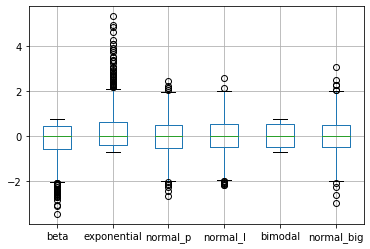

In [14]:
df_s.boxplot()

In [15]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.4454452204613917,
 -0.6788476216326906,
 -2.656664809265713,
 -2.1787331191871915,
 -0.7052959196879366,
 -2.9405575118377842]

In [16]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.7508677714263012,
 5.312643318110875,
 2.465915503153664,
 2.5729034621861846,
 0.7426702821524456,
 3.081455563847249]

In [17]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([ 5.19626858e+01,  7.35963947e+00,  1.00098253e+01,  9.96309339e+00,
       -1.58793659e+00,  9.99533707e+05])